# Plotting Drifters

### Classes and modules

In [1]:
#Lets have matplotlib "inline"
%matplotlib inline

import os
import sys

#Import packages we need
import numpy as np
import datetime
from IPython.display import display
import copy

#For plotting
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams["lines.color"] = "w"
plt.rcParams["text.color"] = "w"
plt.rcParams["axes.labelcolor"] = "w"
plt.rcParams["xtick.color"] = "w"
plt.rcParams["ytick.color"] = "w"

plt.rcParams["image.origin"] = "lower"

from importlib import reload

import pycuda.driver as cuda

GPU Ocean-modules:

In [2]:
from gpuocean.utils import IPythonMagic, Common, WindStress, DrifterPlotHelper, Observation
from gpuocean.SWEsimulators import CDKLM16, ModelErrorKL
from gpuocean.drifters import MLDrifterCollection, GPUDrifterCollection


In [3]:
%cuda_context_handler gpu_ctx

In [4]:
gpu_stream = cuda.Stream()

Basin utils

In [5]:
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../')))
from utils.BasinInit import *
from utils.BasinPlot import * 
from utils.BasinParameters import * 
from utils.BasinEnsembleInit import * 

In [6]:
grid_args = initGridSpecs(10)

In [7]:
from gpuocean.utils import Observation, DrifterPlotHelper

## Truth

In [8]:
truth_path = "/home/florianb/havvarsel/multilevelDA/scripts/DataAssimilation/BasinTruth/2023-09-07T11_20_08L10"

true_trajectories = Observation.Observation(domain_size_x=grid_args["nx"]*grid_args["dx"],
                                            domain_size_y=grid_args["ny"]*grid_args["dy"], 
                                            nx=grid_args["nx"], ny=grid_args["ny"])

true_trajectories.read_pickle(os.path.join(truth_path, "truth_trajectories.pickle"))

In [9]:
true_trajectories.get_num_drifters()

25

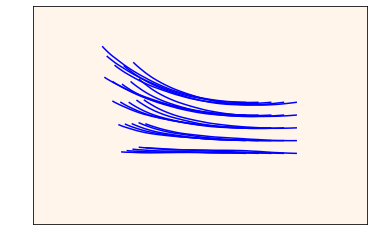

In [10]:
drifter_domain = DrifterPlotHelper.domain_around_drifter(true_trajectories, drifter_id=10, padding_in_km=15)
ax, extent = DrifterPlotHelper.make_generic_background(grid_args["dx"], grid_args["dy"], nx=grid_args["nx"], ny=grid_args["ny"], background_type="empty", return_extent=True)
DrifterPlotHelper.set_drifter_zoom(ax, extent, drifter_domain, grid_args["dx"], grid_args["dy"])
for d in range(true_trajectories.get_num_drifters()):
    DrifterPlotHelper.add_drifter_on_background(ax, true_trajectories, drifter_id=d)

## SLMC ensemble

In [11]:
slmc_path = "/home/florianb/havvarsel/multilevelDA/scripts/MC/SL/2023-09-07T13_48_41L10"

slmc_drifter_path = os.path.join(slmc_path, "sldrifters")

slmc_trajectories = []
for f in os.listdir(slmc_drifter_path):
    trajectory = Observation.Observation(domain_size_x=grid_args["nx"]*grid_args["dx"],
                                            domain_size_y=grid_args["ny"]*grid_args["dy"], 
                                            nx=grid_args["nx"], ny=grid_args["ny"])

    trajectory.read_pickle(os.path.join(slmc_drifter_path,f))
    
    slmc_trajectories.append(trajectory)


## MLMC drifters

In [12]:
mlmc_path = "/home/florianb/havvarsel/multilevelDA/scripts/MC/ML/2023-09-07T16_13_17L10"

mlmc_drifter_path = os.path.join(mlmc_path, "mldrifters")

mlmc_trajectories = []
for f in os.listdir(mlmc_drifter_path):
    trajectory = Observation.Observation(domain_size_x=grid_args["nx"]*grid_args["dx"],
                                            domain_size_y=grid_args["ny"]*grid_args["dy"], 
                                            nx=grid_args["nx"], ny=grid_args["ny"])

    trajectory.read_pickle(os.path.join(mlmc_drifter_path,f))
    
    mlmc_trajectories.append(trajectory)

## SLDA drifters

In [13]:
slda_path = "/home/florianb/havvarsel/multilevelDA/scripts/DataAssimilation/BasinSL/2023-09-07T13_43_59L10"

slda_drifter_path = os.path.join(slda_path, "sldrifters")

slda_trajectories = []
for f in os.listdir(slda_drifter_path):
    trajectory = Observation.Observation(domain_size_x=grid_args["nx"]*grid_args["dx"],
                                            domain_size_y=grid_args["ny"]*grid_args["dy"], 
                                            nx=grid_args["nx"], ny=grid_args["ny"])

    trajectory.read_pickle(os.path.join(slda_drifter_path,f))
    
    slda_trajectories.append(trajectory)

## MLDA drifters

In [14]:
mlda_path = "/home/florianb/havvarsel/multilevelDA/scripts/DataAssimilation/Basin/2023-09-07T11_29_10L10"

mlda_drifter_path = os.path.join(mlda_path, "mldrifters")

mlda_trajectories = []
for f in os.listdir(mlda_drifter_path):
    trajectory = Observation.Observation(domain_size_x=grid_args["nx"]*grid_args["dx"],
                                            domain_size_y=grid_args["ny"]*grid_args["dy"], 
                                            nx=grid_args["nx"], ny=grid_args["ny"])

    trajectory.read_pickle(os.path.join(mlda_drifter_path,f))
    
    mlda_trajectories.append(trajectory)

## Comparison

/home/florianb/miniconda3/envs/gpuocean_opendrift/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


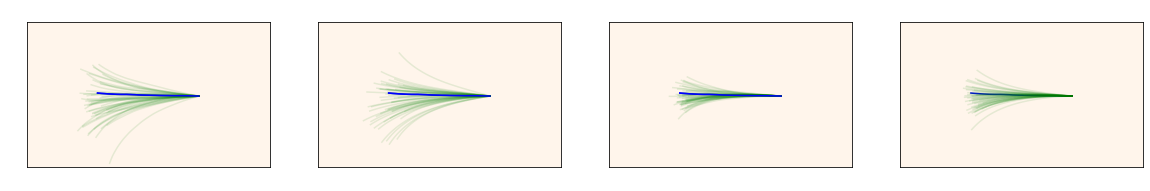

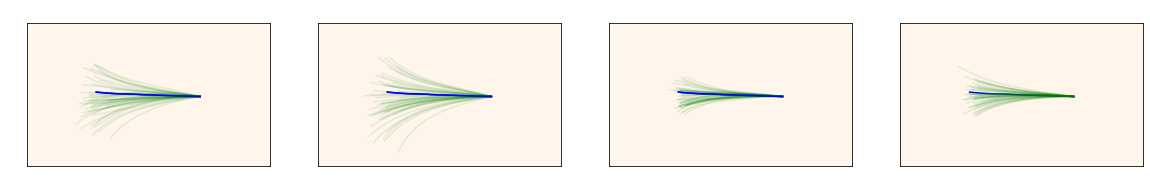

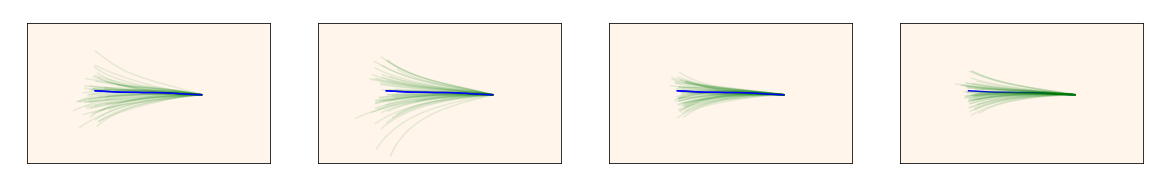

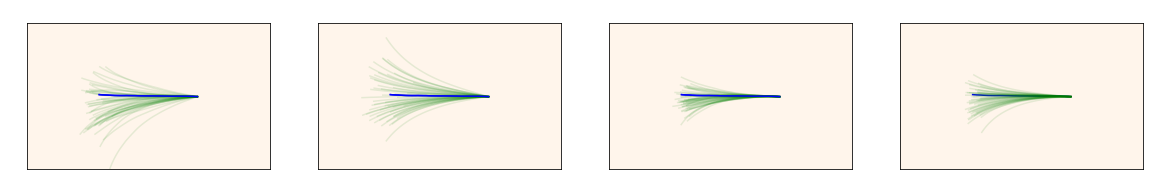

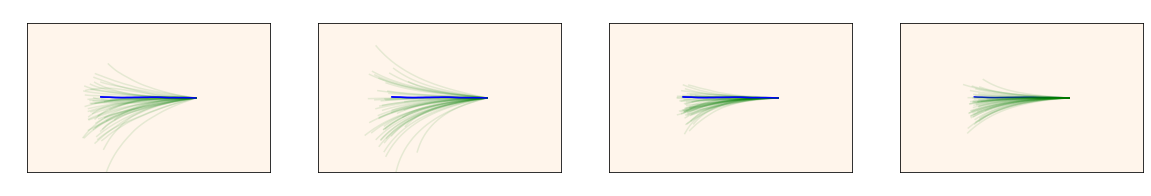

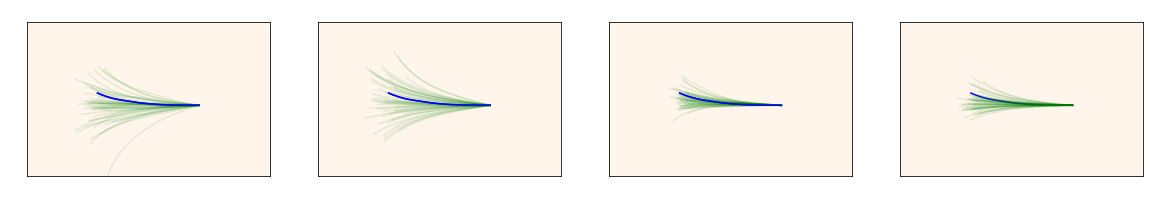

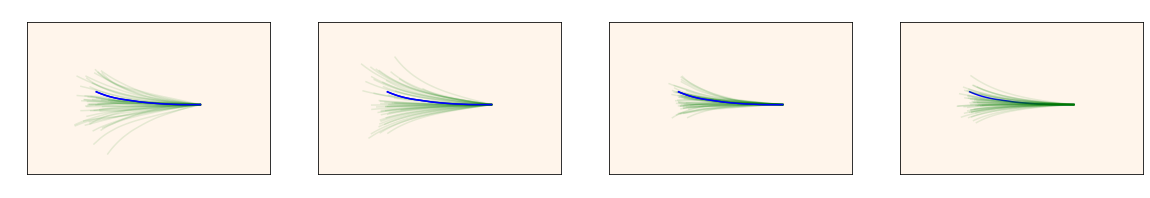

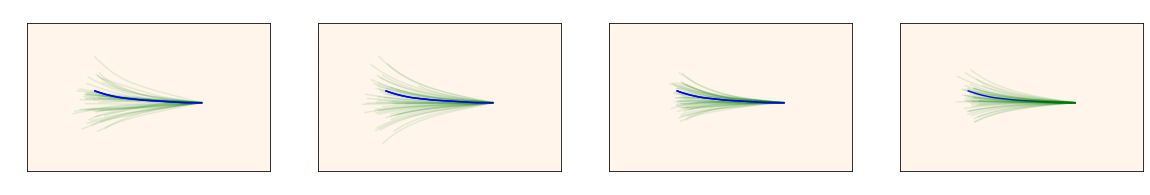

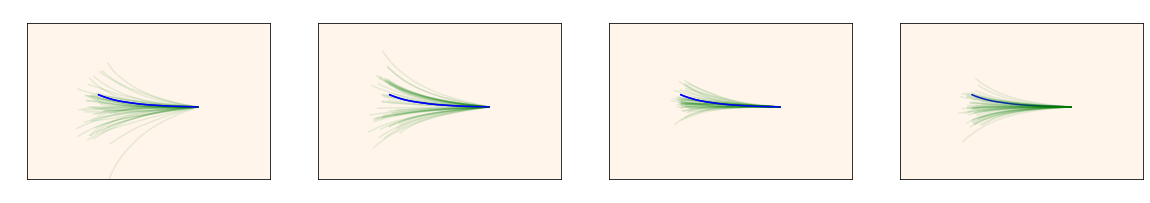

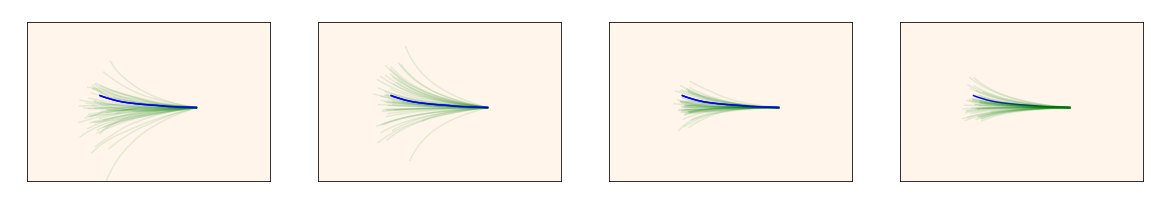

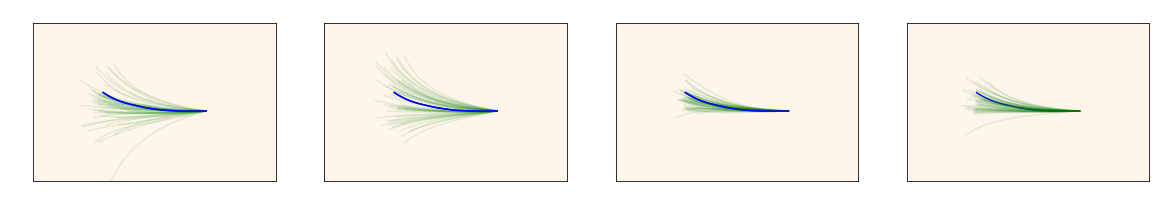

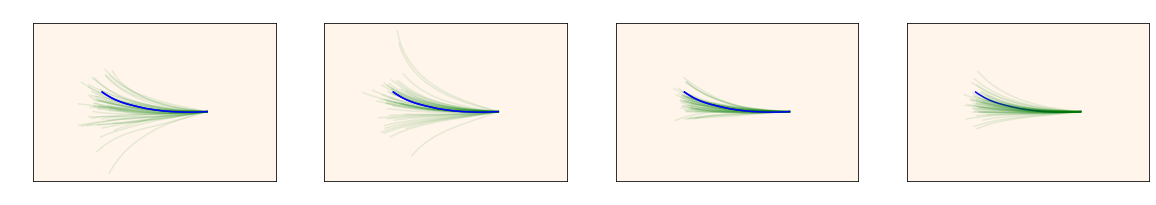

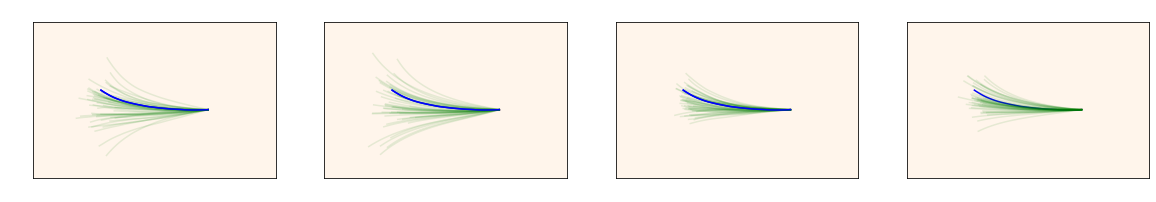

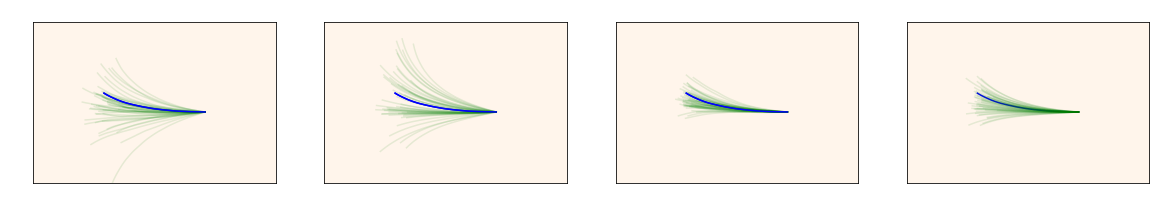

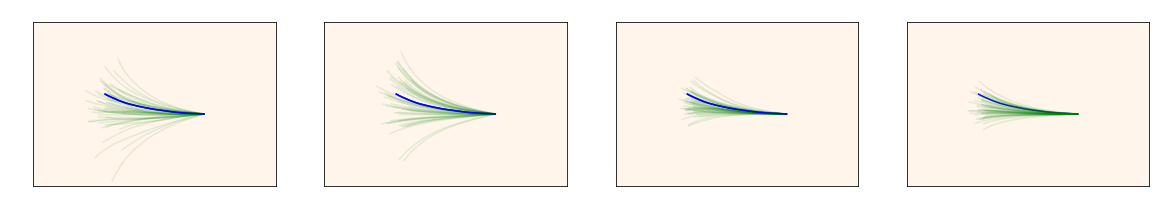

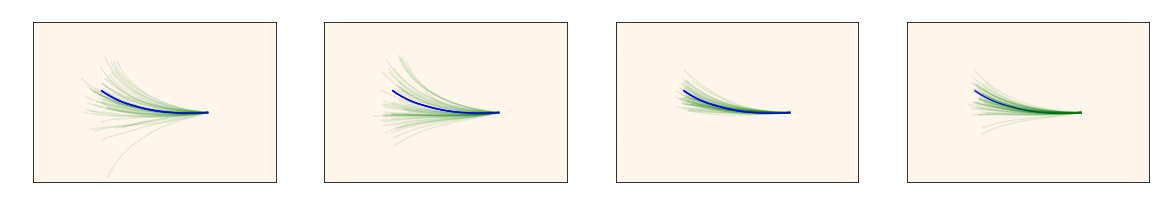

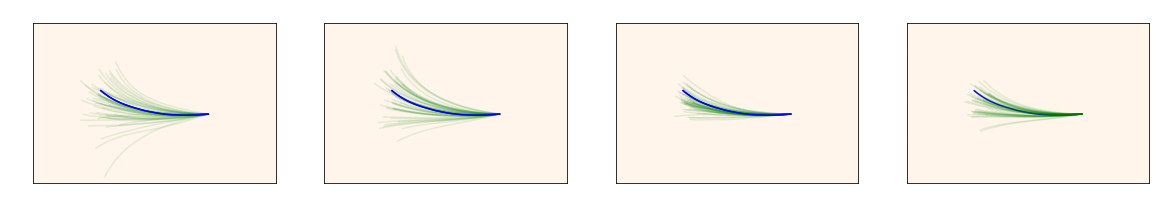

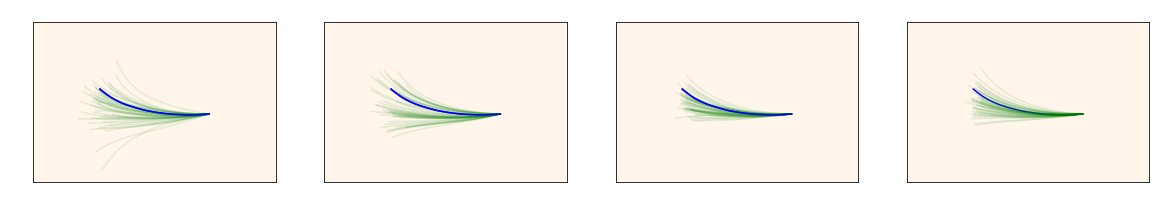

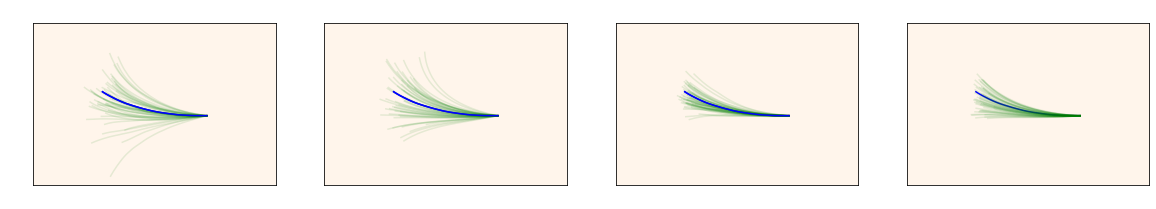

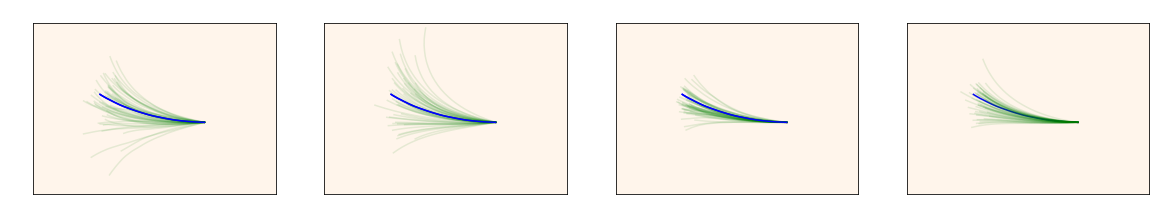

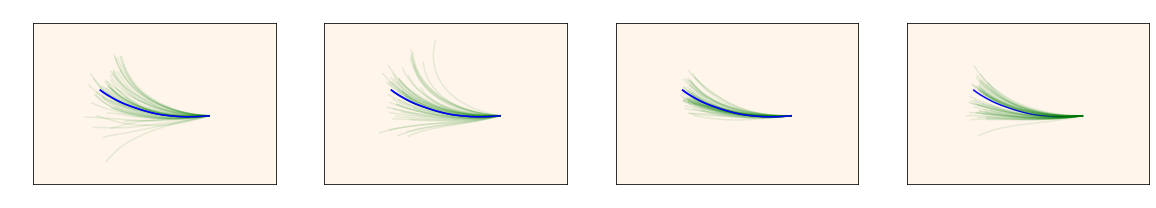

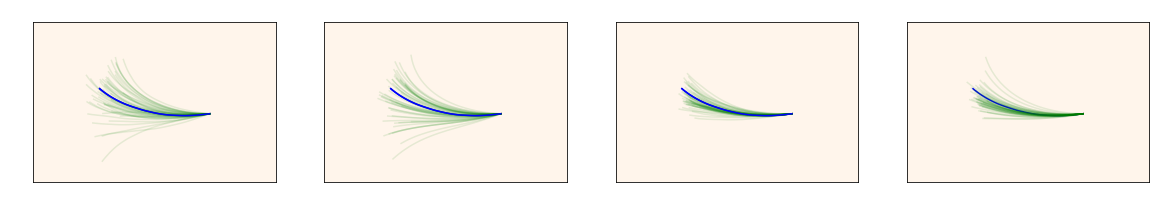

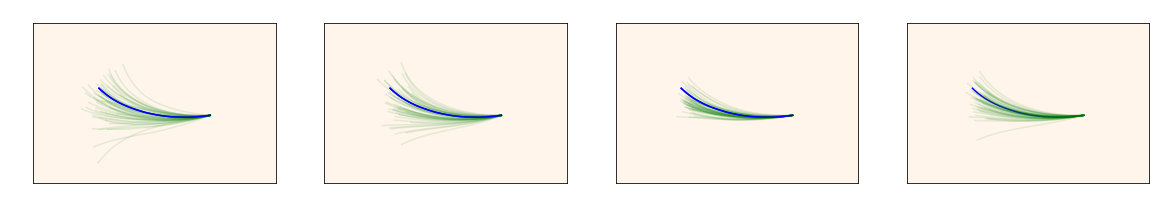

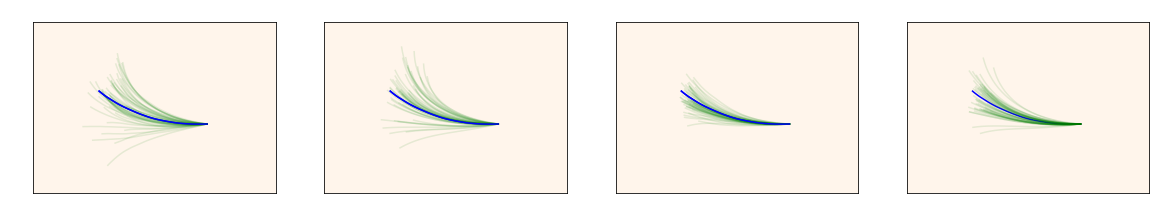

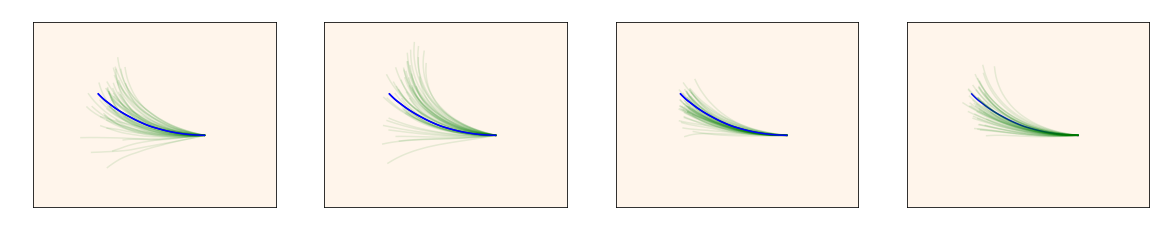

In [16]:
for d in range(true_trajectories.get_num_drifters()):

    fig, axs = plt.subplots(1,4, figsize=(20,5))

    drifter_domain = DrifterPlotHelper.domain_around_drifter(true_trajectories, drifter_id=d, padding_in_km=15)
    for i in range(len(axs)):
        axs[i] = DrifterPlotHelper.background_from_grid_parameters(grid_args["nx"], grid_args["ny"], grid_args["dx"], grid_args["dy"],
                                                        drifter_domain=drifter_domain, ax=axs[i])
        DrifterPlotHelper.add_drifter_on_background(axs[i], true_trajectories, drifter_id=d)
        
    axs[0].set_title("SL MC")
    axs[1].set_title("ML MC")
    axs[2].set_title("SL DA")
    axs[3].set_title("ML DA")

    DrifterPlotHelper.add_ensemble_drifter_on_background(axs[0], slmc_trajectories, drifter_id=d, color='Green', alpha=0.1)
    DrifterPlotHelper.add_ensemble_drifter_on_background(axs[1], mlmc_trajectories, drifter_id=d, color='Green', alpha=0.1)
    DrifterPlotHelper.add_ensemble_drifter_on_background(axs[2], slda_trajectories, drifter_id=d, color='Green', alpha=0.1)
    DrifterPlotHelper.add_ensemble_drifter_on_background(axs[3], mlda_trajectories, drifter_id=d, color='Green', alpha=0.1)

    for i in range(3):
        DrifterPlotHelper.add_drifter_on_background(axs[i], true_trajectories, drifter_id=d)

/home/florianb/miniconda3/envs/gpuocean_opendrift/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


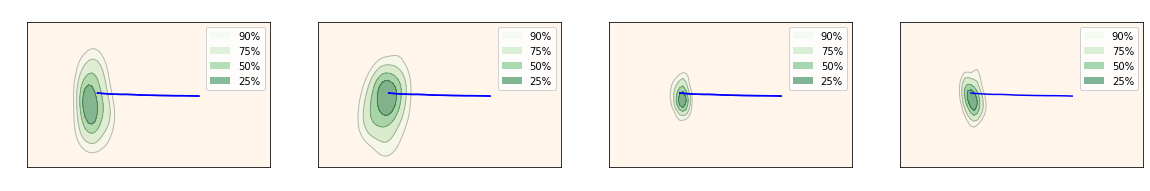

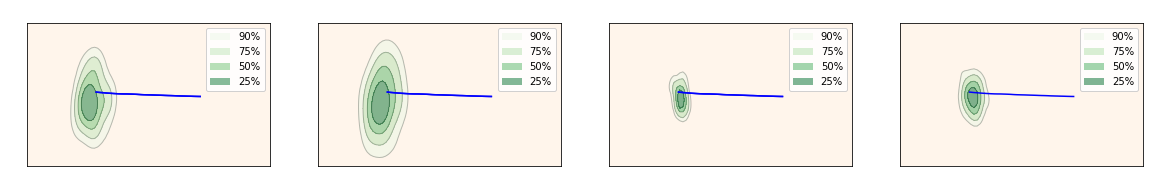

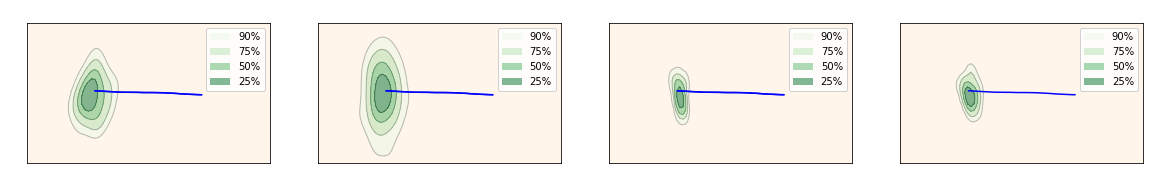

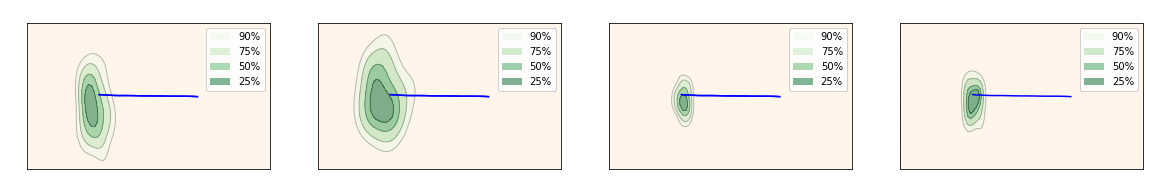

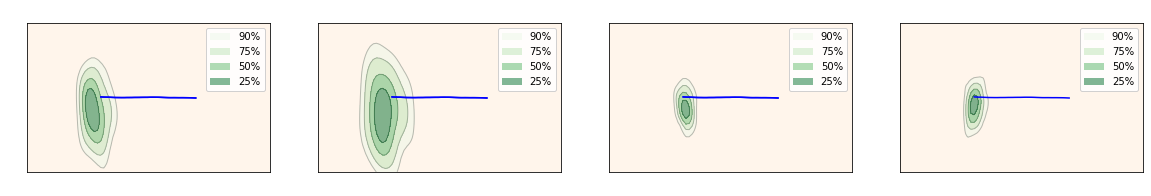

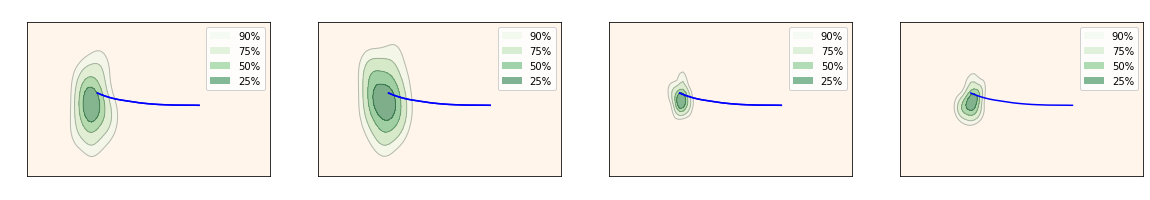

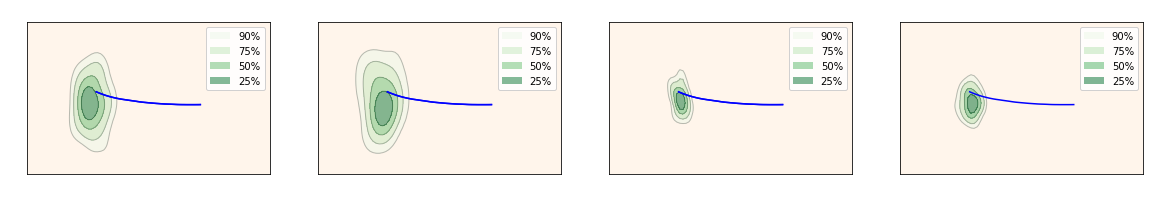

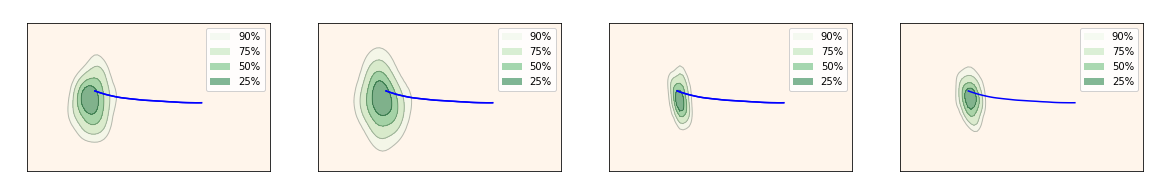

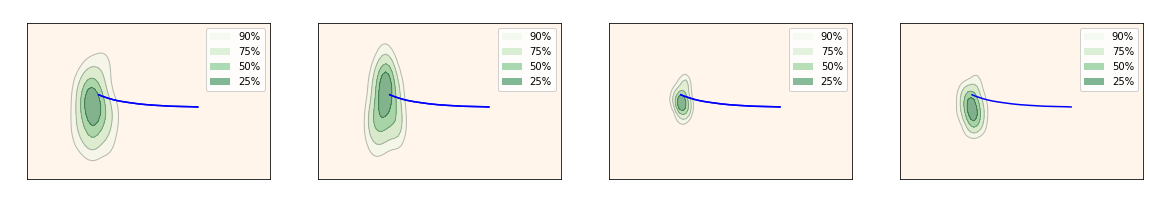

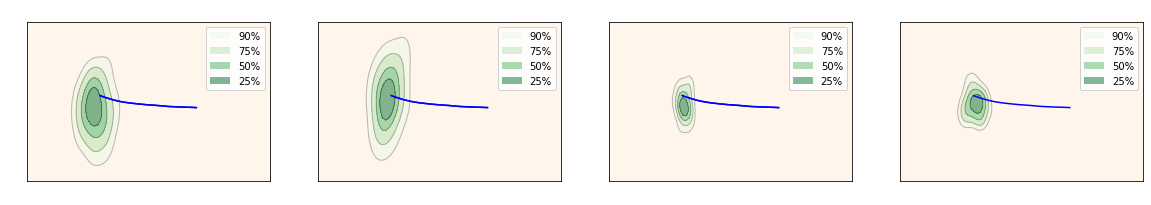

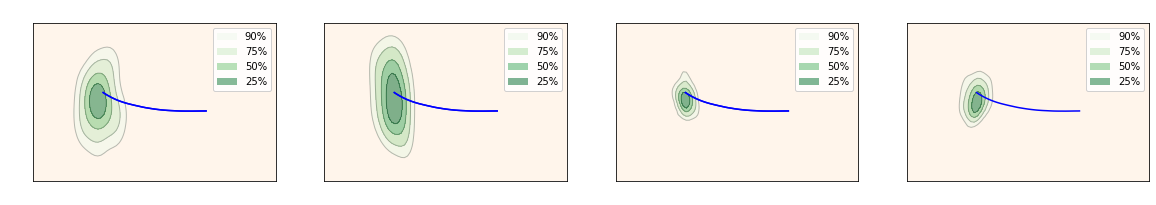

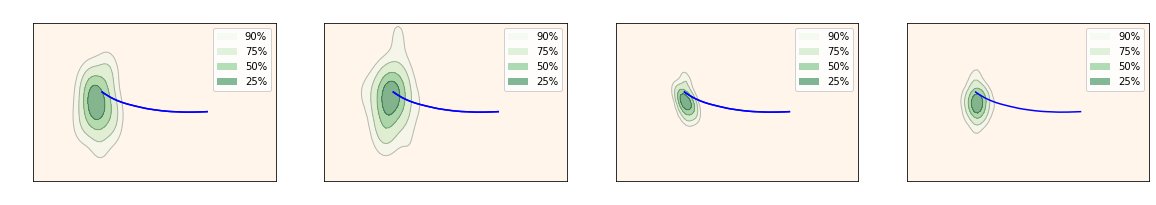

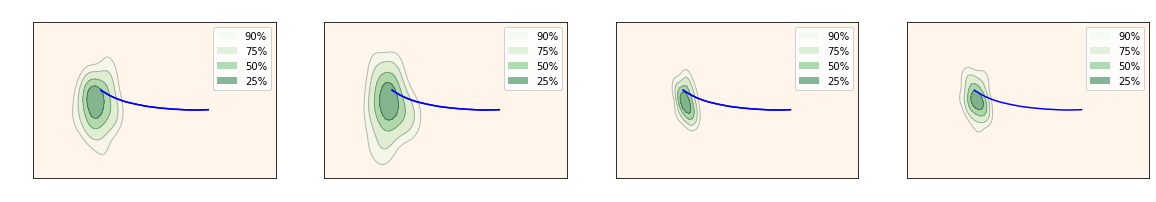

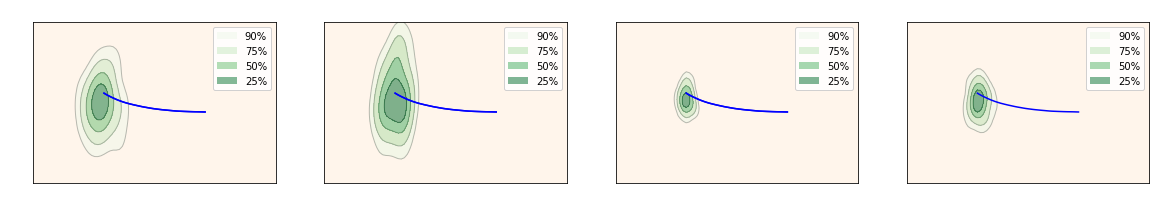

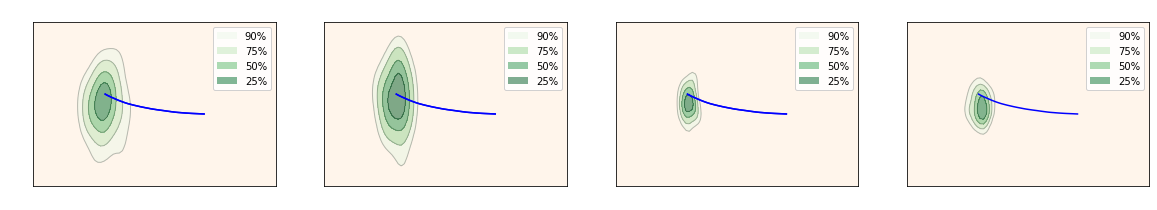

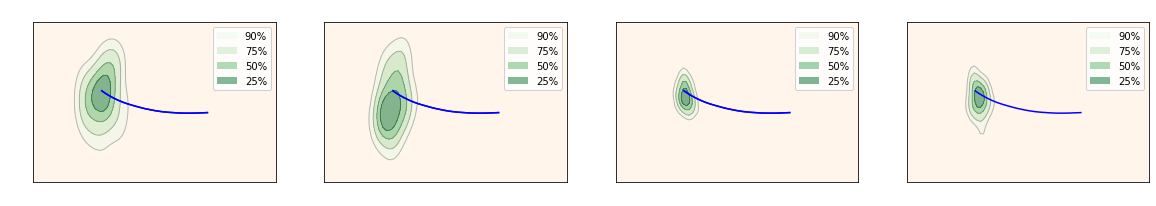

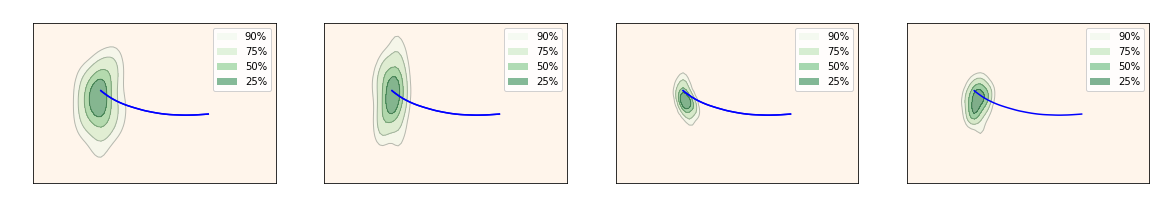

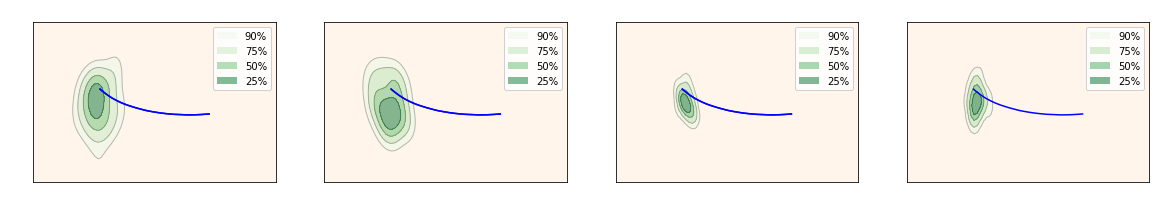

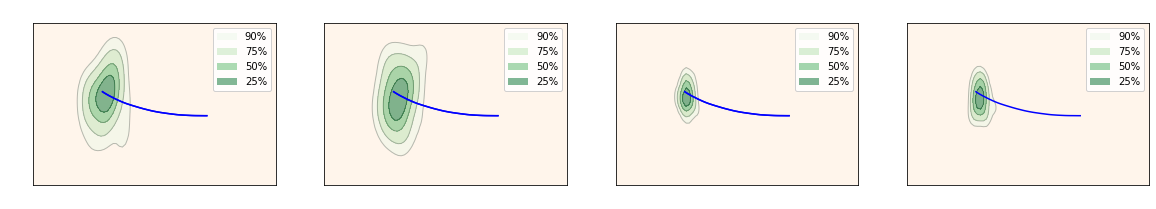

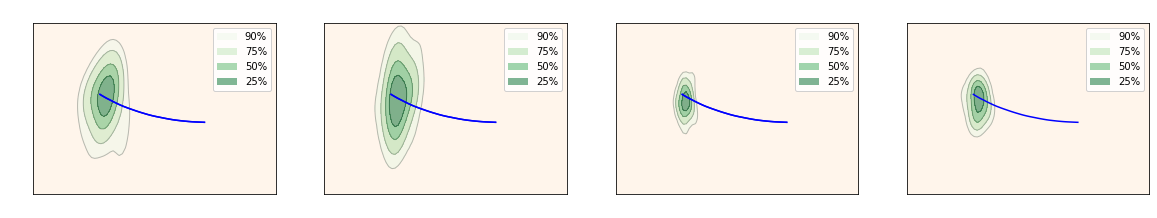

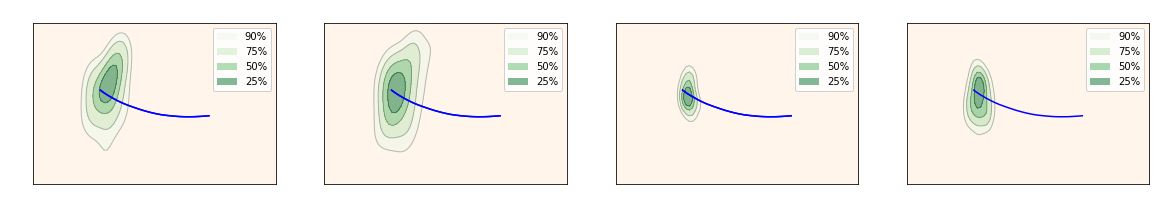

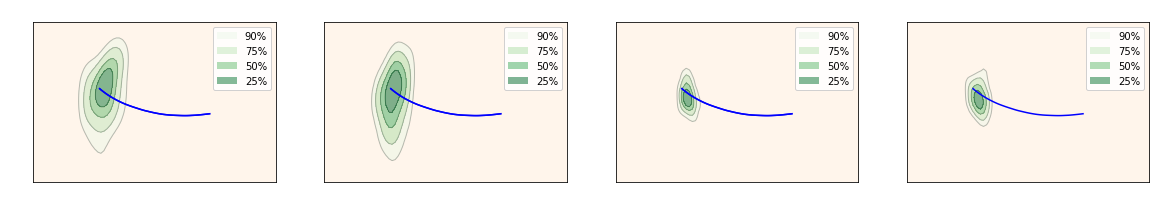

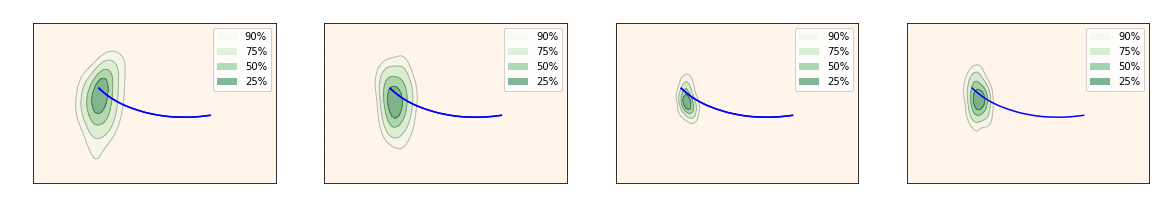

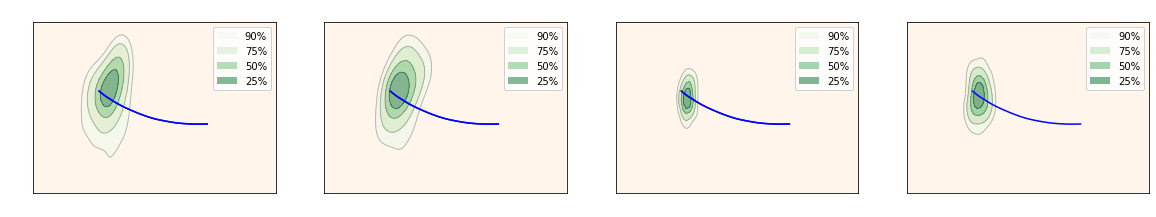

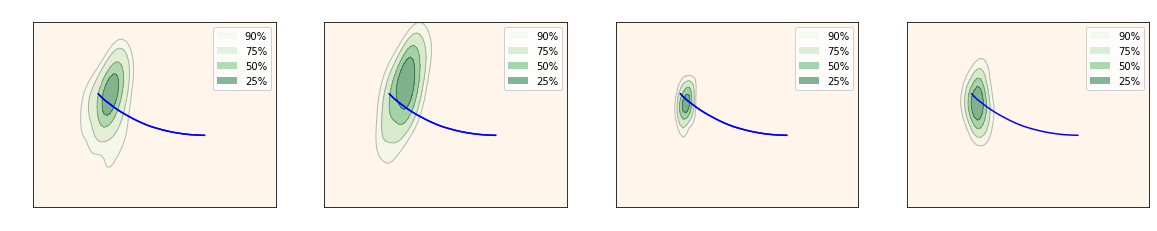

In [17]:
for d in range(true_trajectories.get_num_drifters()):

    fig, axs = plt.subplots(1,4, figsize=(20,5))

    drifter_domain = DrifterPlotHelper.domain_around_drifter(true_trajectories, drifter_id=d, padding_in_km=15)
    for i in range(len(axs)):
        axs[i] = DrifterPlotHelper.background_from_grid_parameters(grid_args["nx"], grid_args["ny"], grid_args["dx"], grid_args["dy"],
                                                        drifter_domain=drifter_domain, ax=axs[i])
        DrifterPlotHelper.add_drifter_on_background(axs[i], true_trajectories, drifter_id=d)
        
    axs[0].set_title("SL MC")
    axs[1].set_title("ML MC")
    axs[2].set_title("SL DA")
    axs[3].set_title("ML DA")

    DrifterPlotHelper.add_kde_on_background(axs[0], slmc_trajectories, drifter_id=d, color='Green', alpha=0.1)
    DrifterPlotHelper.add_kde_on_background(axs[1], mlmc_trajectories, drifter_id=d, color='Green', alpha=0.1)
    DrifterPlotHelper.add_kde_on_background(axs[2], slda_trajectories, drifter_id=d, color='Green', alpha=0.1)
    DrifterPlotHelper.add_kde_on_background(axs[3], mlda_trajectories, drifter_id=d, color='Green', alpha=0.1)

    for i in range(3):
        DrifterPlotHelper.add_drifter_on_background(axs[i], true_trajectories, drifter_id=d)